## Data Analysis and Visualization performed on Airbnb Boston Dataset

In [1]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

In [2]:
listings = pd.read_csv('listings.csv')

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Price data is object. It includes a sign $. So we need to remove it.

In [4]:
# clean price data
listings.price = listings.price.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x)) 

Let's make a map, where the size and color of points depend on the price.

/Users/adityasatalkar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


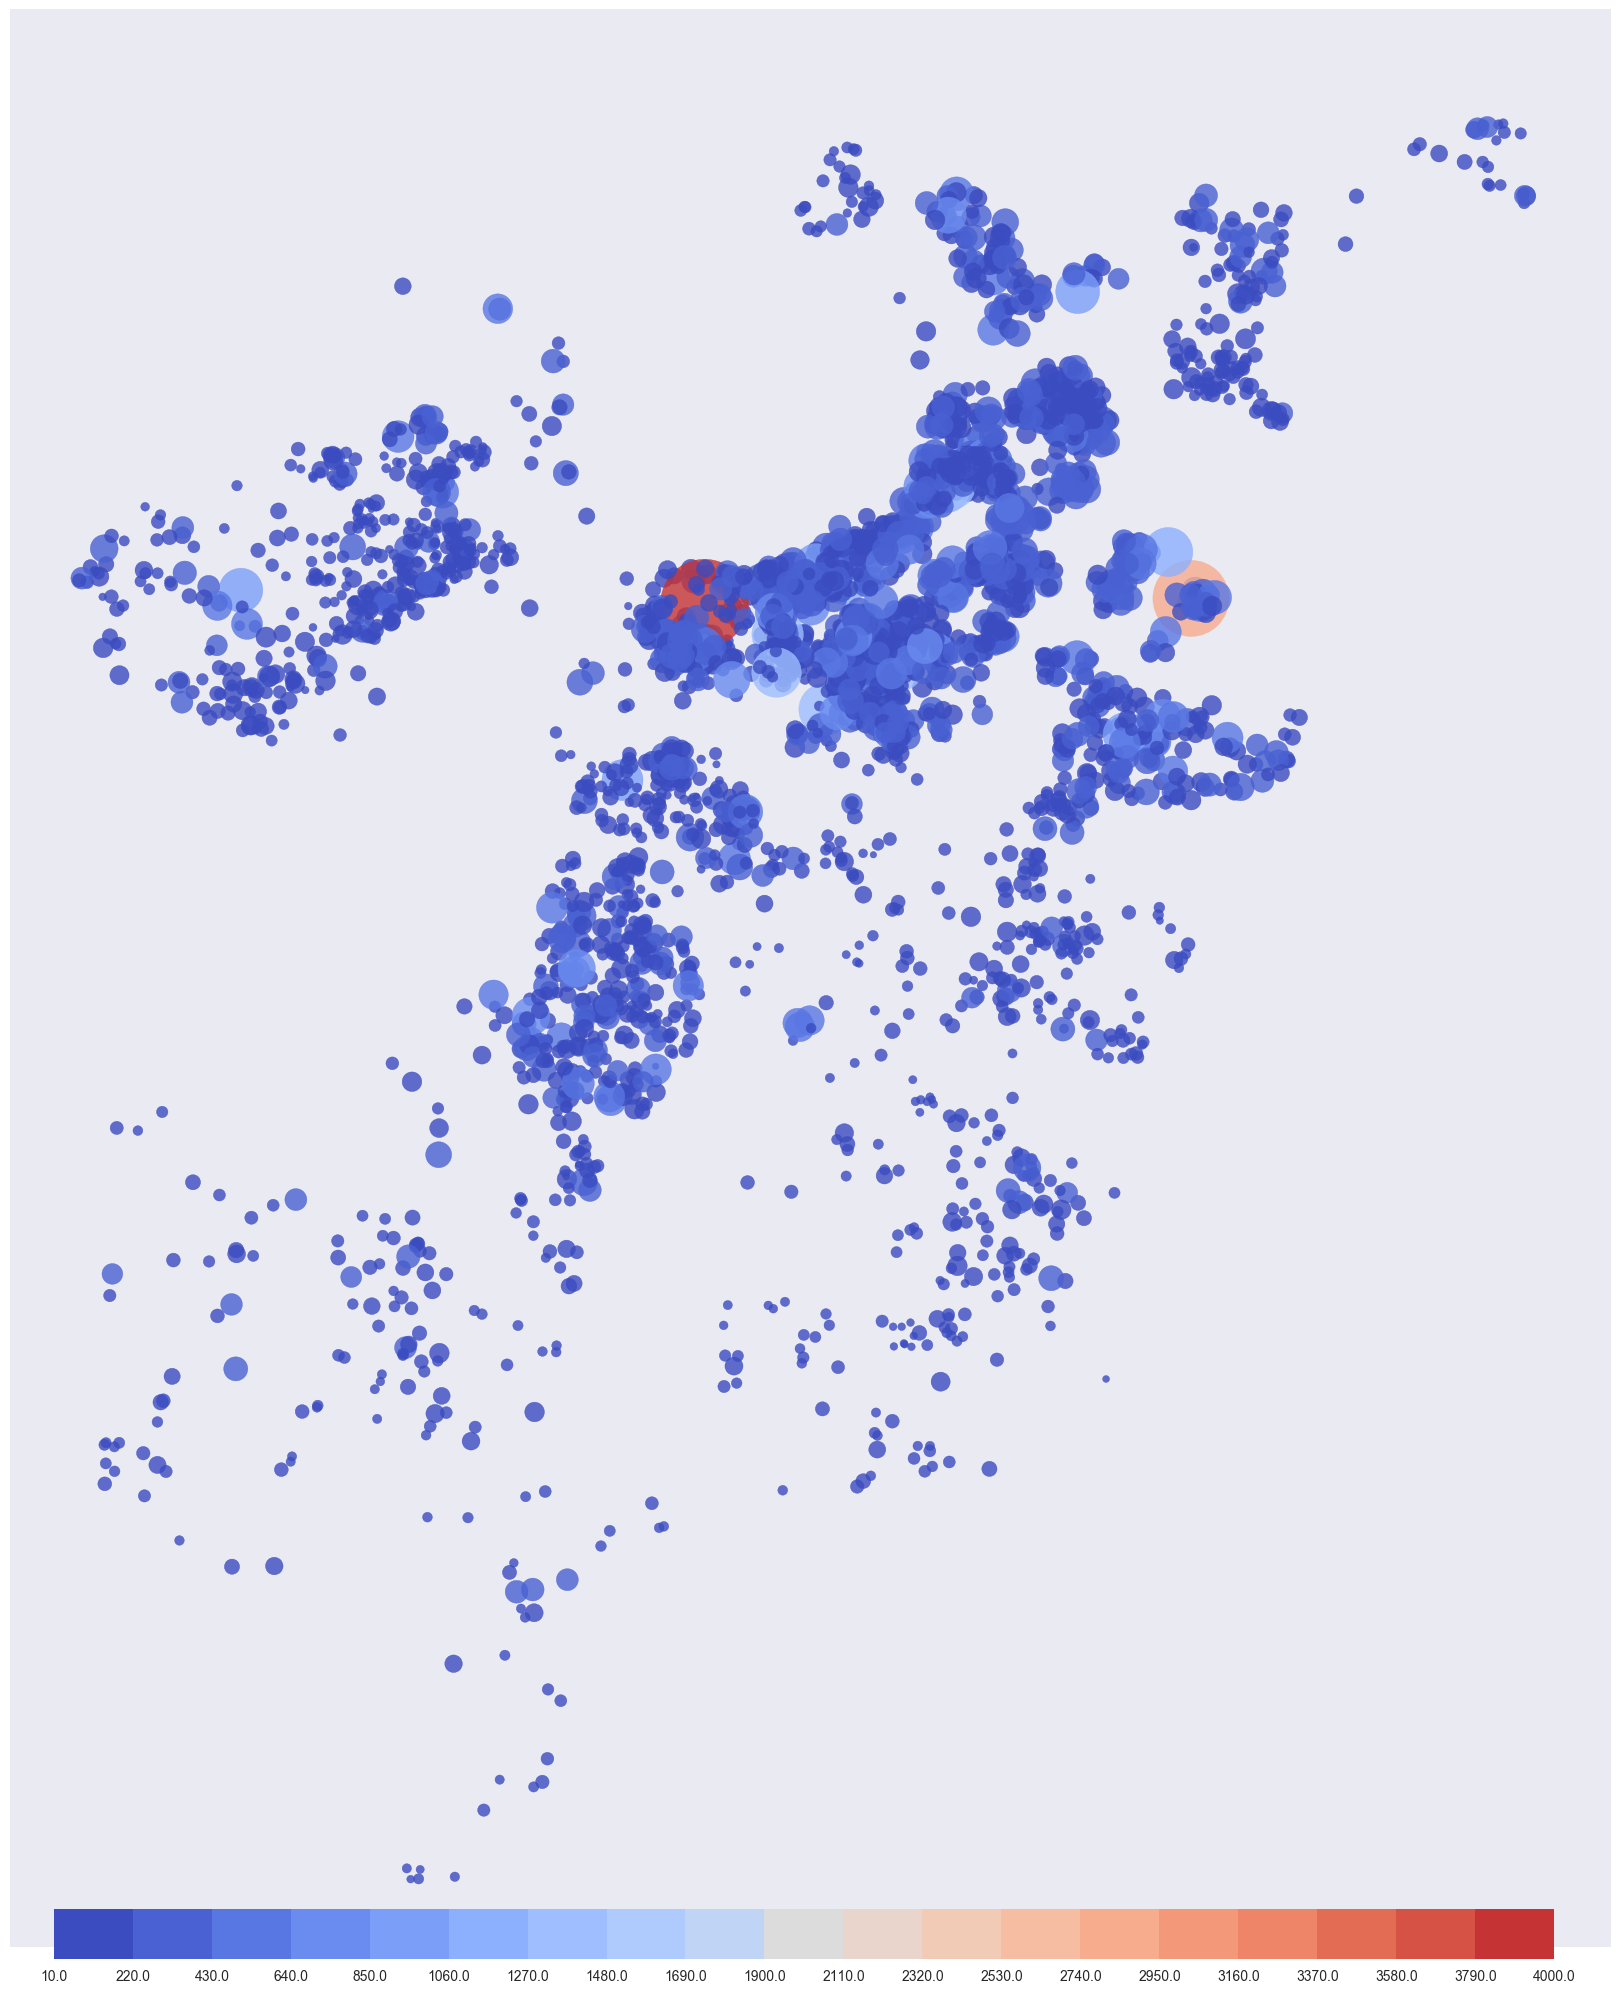

In [5]:
fig = plt.figure(figsize=(25,25))

m = Basemap(projection='merc', llcrnrlat=42.23, urcrnrlat=42.4, llcrnrlon=-71.18, urcrnrlon=-70.99,)

m.drawcountries()

num_colors = 20
values = listings.price
cm = plt.get_cmap('coolwarm')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
listings['bin'] = np.digitize(values, bins) - 1
cmap = mpl.colors.ListedColormap(scheme)

color = [scheme[listings[(listings.latitude==x)&(listings.longitude==y)]['bin'].values] 
             for x,y in zip(listings.latitude, listings.longitude)]

x,y = m(listings.longitude.values, listings.latitude.values)
scat = m.scatter(x,y, s = listings.price, color = color, cmap=cmap, alpha=0.8)


# Draw color legend.
                        #[left, top, width, height]
ax_legend = fig.add_axes([0.21, 0.12, 0.6, 0.02])
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])


plt.show()

Its now time for 3D !

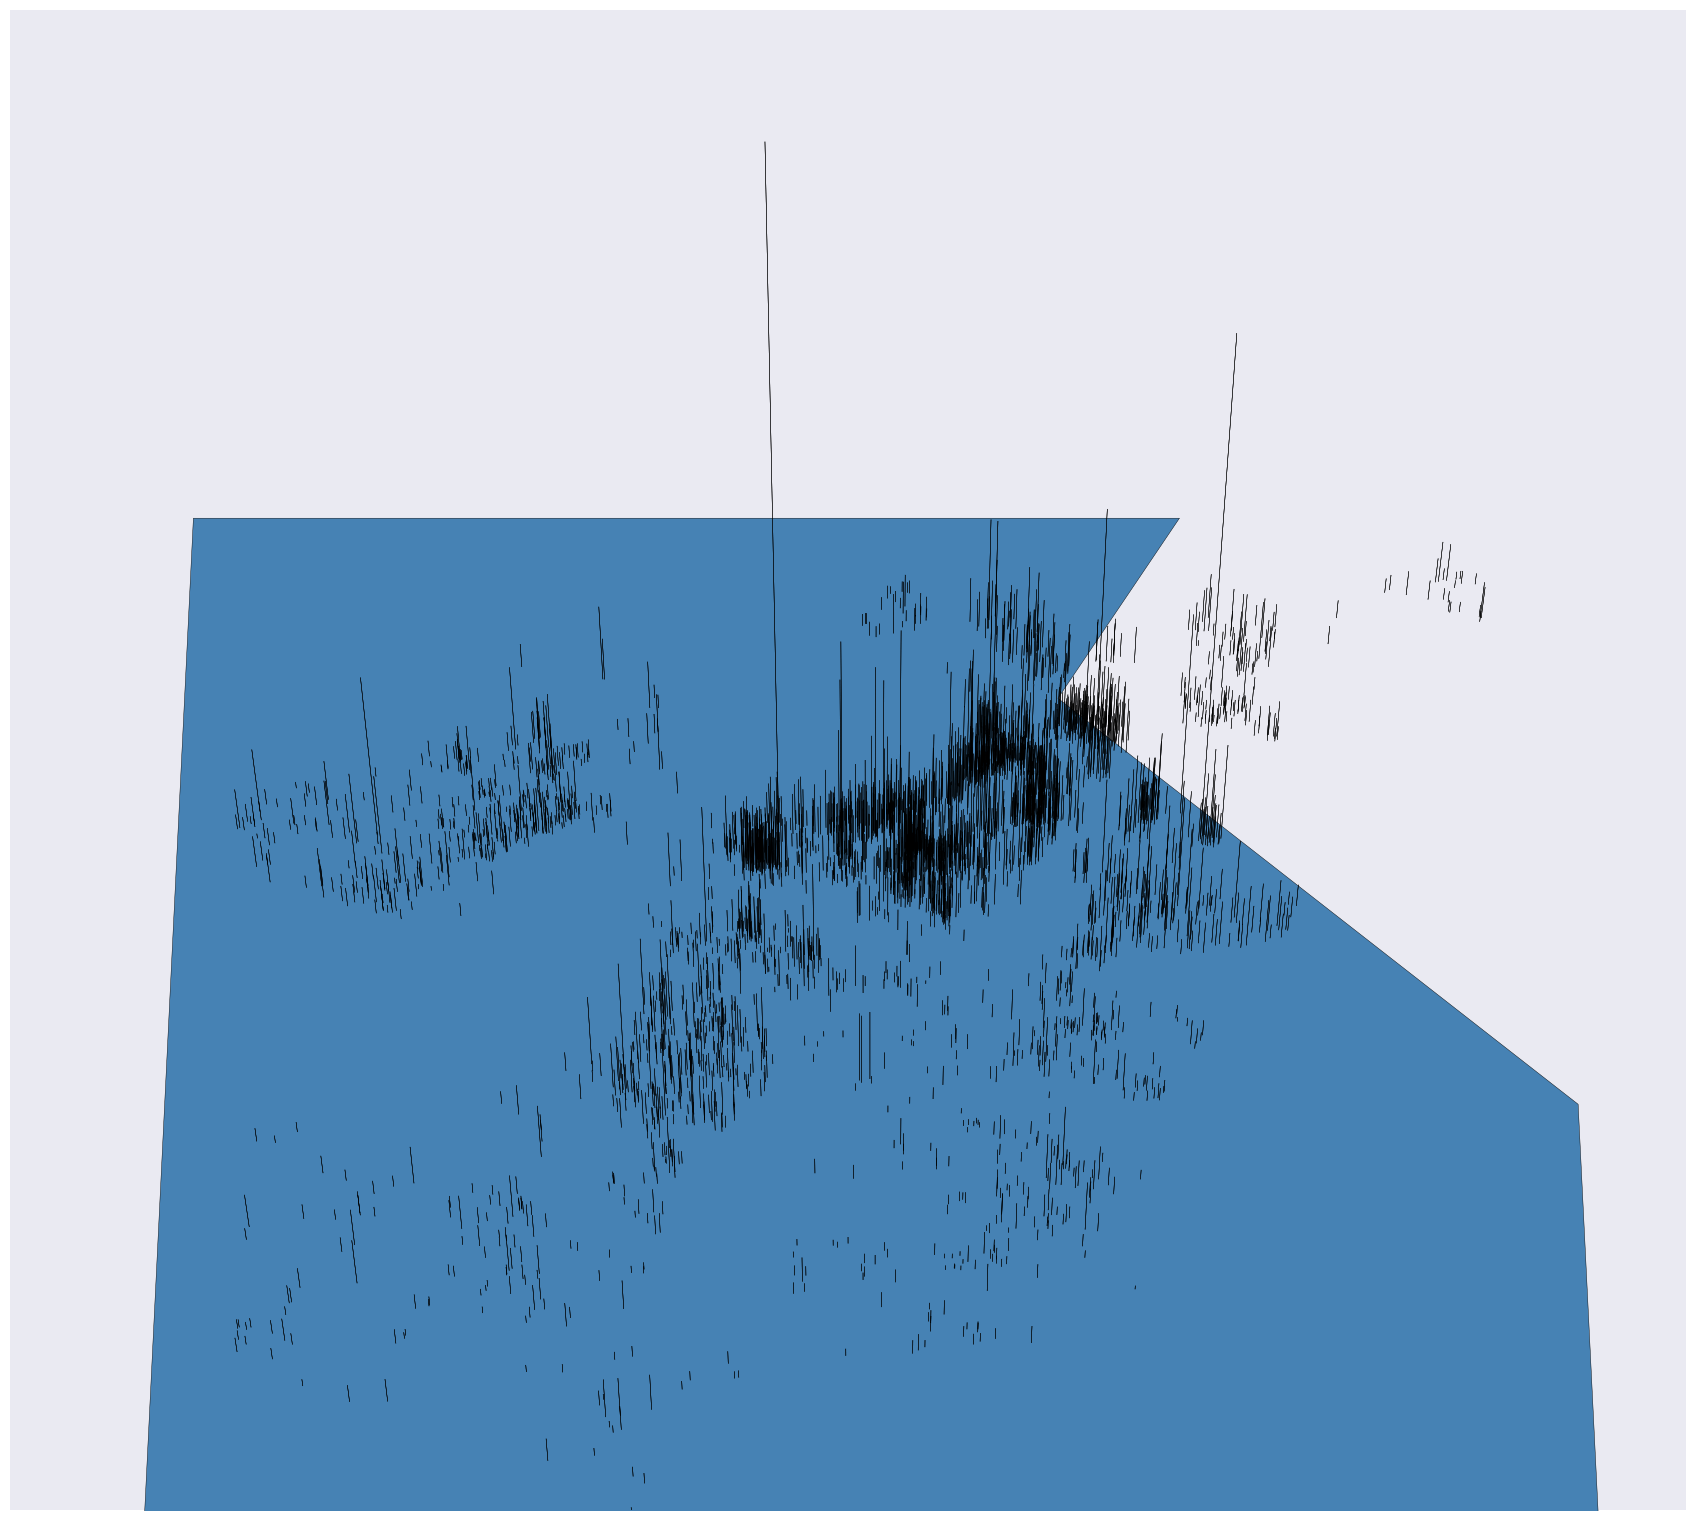

In [6]:
m = Basemap(llcrnrlon=-71.18,llcrnrlat=42.23,urcrnrlon=-70.99,urcrnrlat=42.4)

fig = plt.figure(figsize = [20, 15])
ax = Axes3D(fig)

ax.set_axis_off()
ax.azim = 270
ax.elev = 60
ax.dist = 6

ax.add_collection3d(m.drawcountries(linewidth=0.35, color = 'black'))
ax.add_collection3d(m.drawcountries())

polys = []
for polygon in m.landpolygons:
    polys.append(polygon.get_coords())

lc = PolyCollection(polys, edgecolor='black',
                    facecolor='steelblue', closed=True)
ax.add_collection3d(lc)

x,y = m(listings.longitude.values, listings.latitude.values)
ax.bar3d(x, y, np.zeros(len(x)), 0, 0, listings.price.values, color=color, alpha=0.7)

plt.show()

Dependence of the price from district

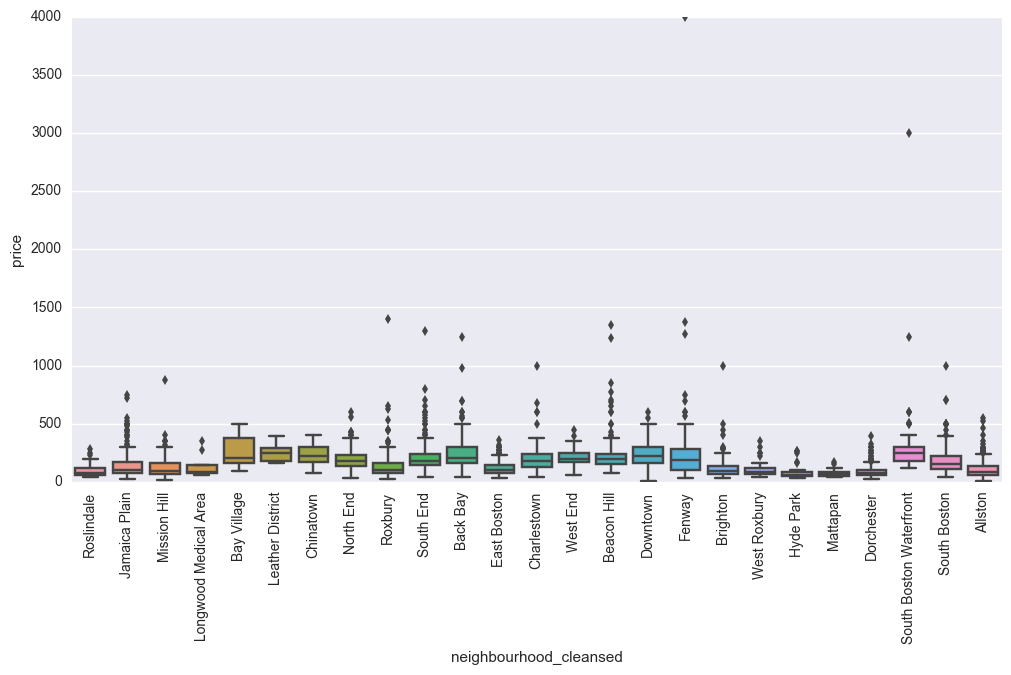

In [7]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price',  data = listings)
xt = plt.xticks(rotation=90)

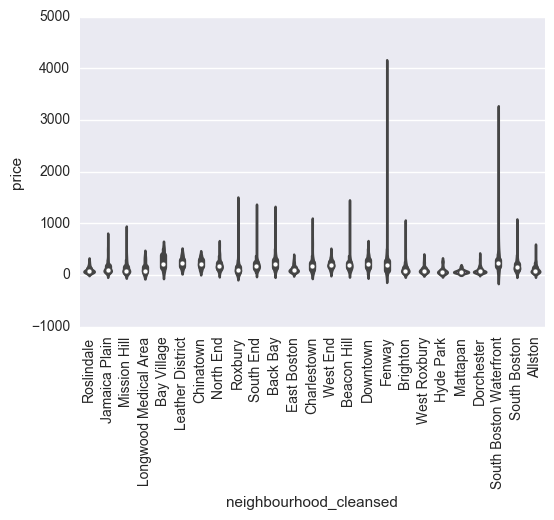

In [8]:
sns.violinplot('neighbourhood_cleansed', 'price', data = listings)
xt = plt.xticks(rotation=90)

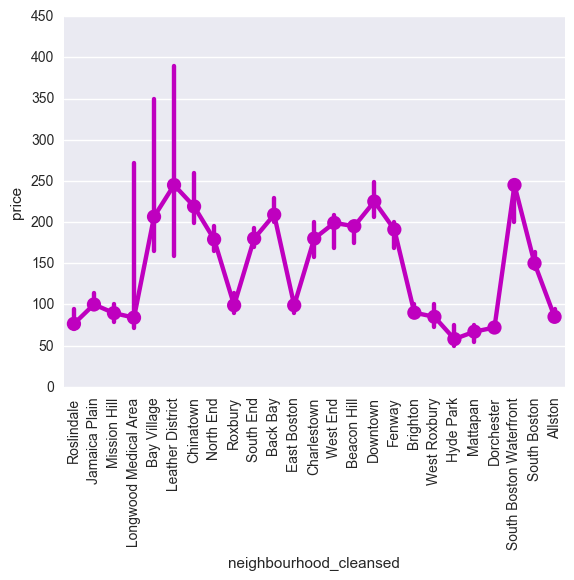

In [9]:
sns.factorplot('neighbourhood_cleansed', 'price', data = listings, color = 'm', \
               estimator = np.median, size = 4.5,  aspect=1.35)
xt = plt.xticks(rotation=90)

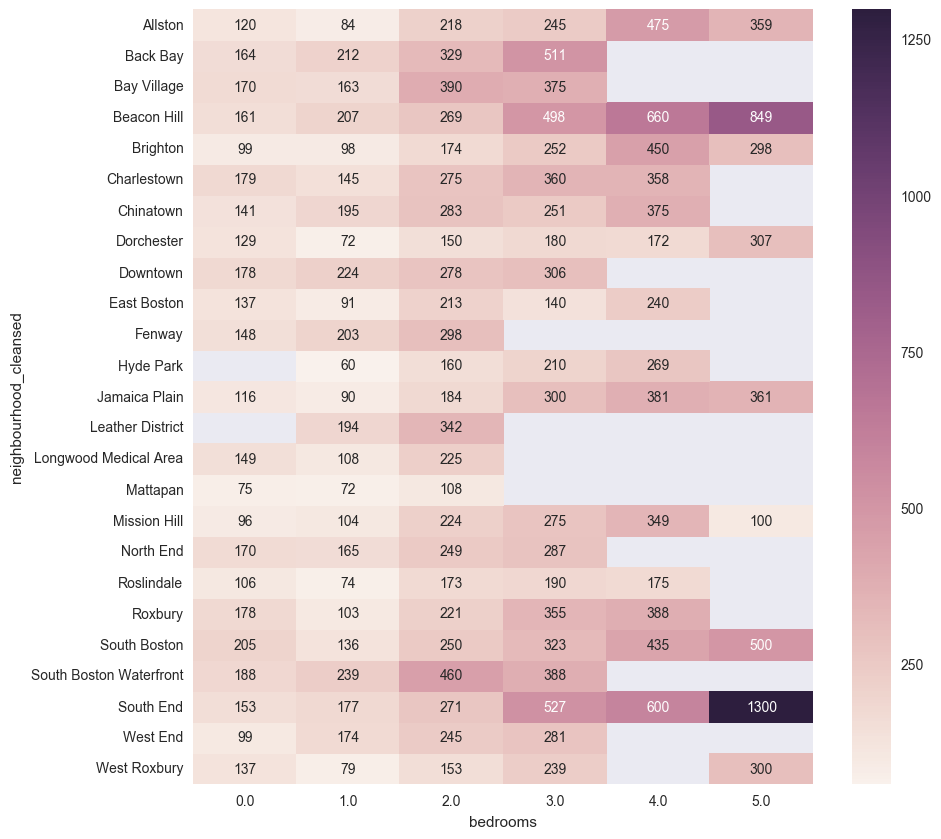

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

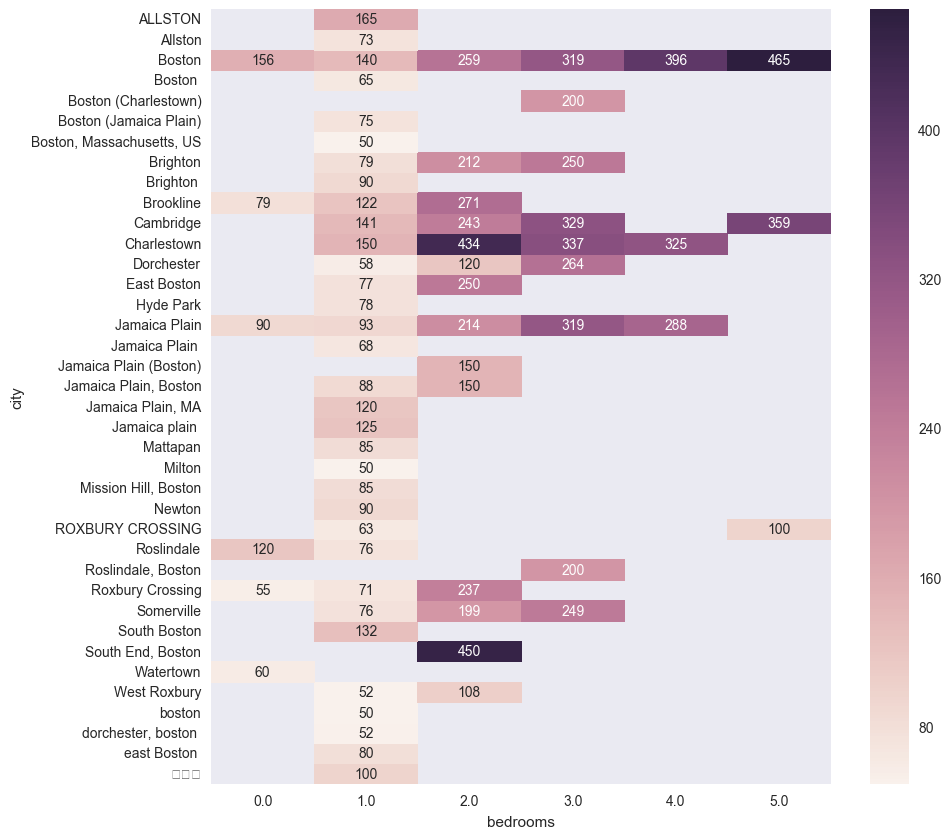

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby([
        'city', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

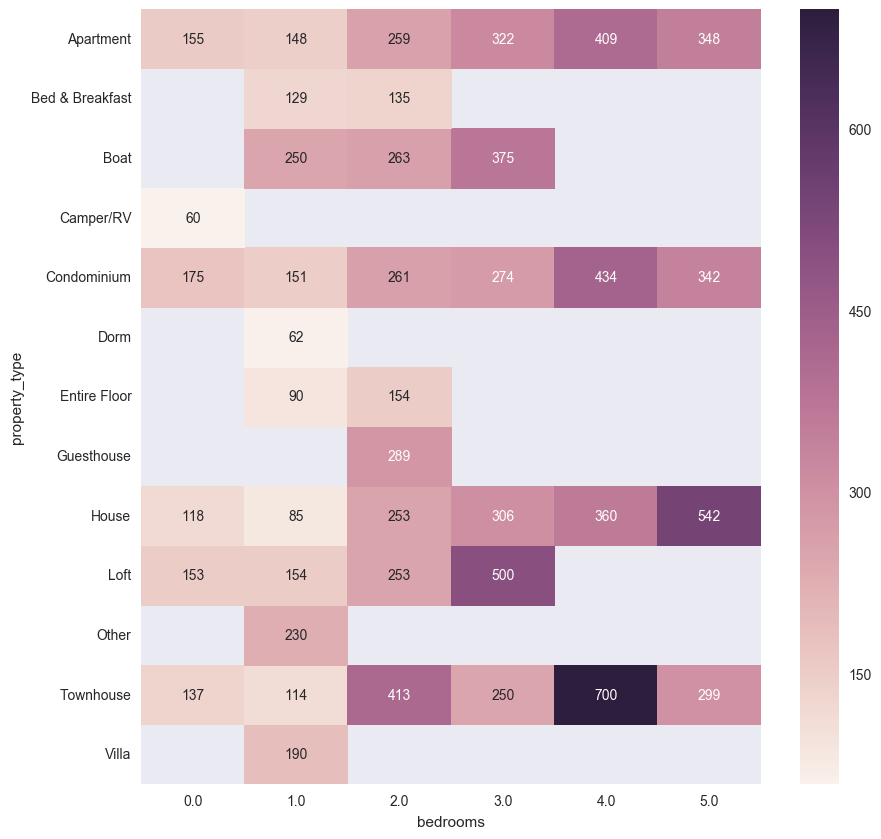

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby(['property_type', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f")

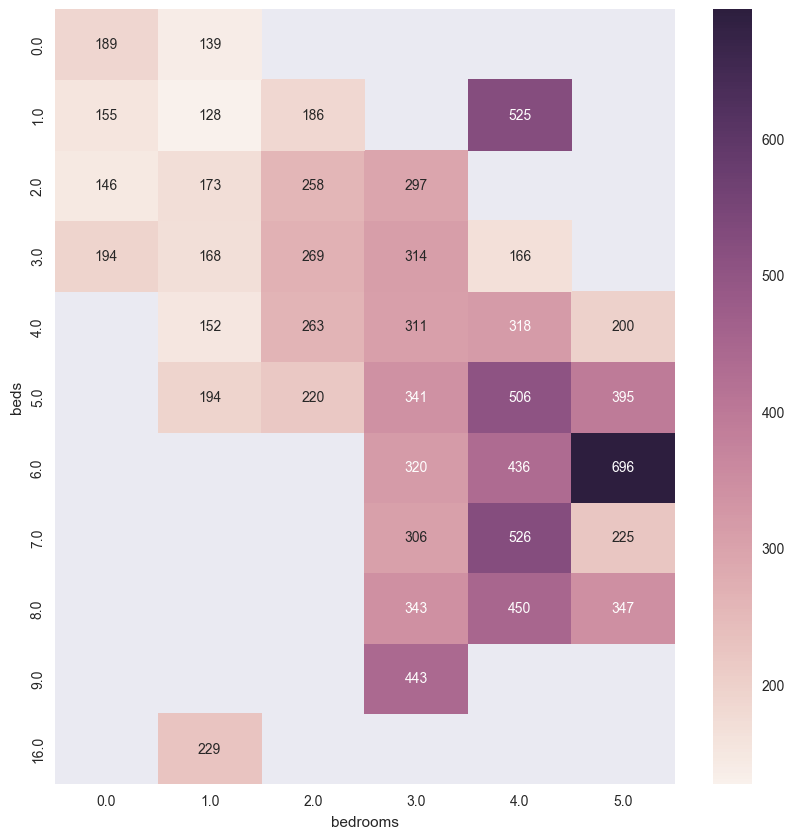

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby(['beds', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f")